In [52]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import statistics
import numpy as np
with open('/content/drive/Shared drives/Cs539 Project/EPLDataset.csv', 'r') as f:
  A = np.genfromtxt(f, delimiter=',')
with open('/content/drive/Shared drives/Cs539 Project/EPL2020.csv', 'r') as f:
  A = np.genfromtxt(f, delimiter=',')

df = pd.read_csv('/content/drive/Shared drives/Cs539 Project/EPLDataset.csv', header=[0])
df1 = pd.read_csv('/content/drive/Shared drives/Cs539 Project/EPL2020.csv', header=[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:

colsToKeep = list(["Div","Date","HomeTeam","AwayTeam","FTHG","HG","FTAG","AG","FTR","Res","HTHG","HTAG","HTR","HS","AS","HST","AST","HHW","AHW","HC","AC","HF","AF","HO","AO","HY","AY","HR","AR"])
allCols = df.columns
colsToDrop = set(allCols) - set(colsToKeep)
df = df.drop(labels=colsToDrop,axis=1)
df1 = df1.drop(labels=colsToDrop,axis=1)

In [54]:
raw_season_data = {}
raw_season_data[0] = df
raw_season_data[1] = df1

In [57]:
def create_home_dict(table,matchNum):
    matchDict={}
    if any('FTR' == table.keys()):
        matchDict={'result':table['FTR'].values[0]}
    elif any('Res'== table.keys()):
        matchDict = {'result':table['Res'].values[0]}
    if any('FTHG' == table.keys()):
        matchDict.update({'Goals':table['FTHG'].values[0]})
    elif any('HG'== table.keys()):
        matchDict.update({'Goals':table['HG'].values[0]})
    if any('FTAG' == table.keys()):
        matchDict.update({'GoalsConceded':table['FTAG'].values[0]})
    elif any('AG'== table.keys()):
        matchDict.update({'GoalsConceded':table['AG'].values[0]})
    matchDict.update({'match':matchNum,'ground':'H', \
                        'Date':table['Date'].values[0],\
                        'TeamAgainst':table['AwayTeam'].values[0],\
                        'HTGoals':table['HTHG'].values[0], \
                        'HTResult':table['HTR'].values[0], \
                        #'Attendance':table['Attendance'].values[0], \
                        'Shots':table['HS'].values[0],\
                        'ShotsAgainst':table['AS'].values[0],\
                        'ShotsOnTarget':table['HST'].values[0],\
                        'ShotsAgainstOnTarget':table['AST'].values[0],\
                        #'ShotsWoodwork':table['HHW'].values[0],\
                        #'ShotsAgainstWoodwork':table['AHW'].values[0],\
                        'Corners':table['HC'].values[0],\
                        'CornersAgainst':table['AC'].values[0],\
                        'FoulsCommited':table['HF'].values[0],\
                        'FoulsAgainst':table['AF'].values[0],\
                        #'Offsies':table['HO'].values[0],\
                        #'OffsidesAgainst':table['AO'].values[0],\
                        'YCards':table['HY'].values[0],\
                        'YCardsAgainst':table['AY'].values[0],\
                        'RCards':table['HR'].values[0],\
                        'RCardsAgainst':table['AR'].values[0]})
                        #'BookingPoints':table['HBP'].values[0],\
                        #'BookingPointsAgainst':table['ABP'].values[0]})

    matchDict.update({'BigChancesCreated': matchDict['ShotsOnTarget']+matchDict['Goals']})
    if matchDict['result']=='H':
        matchDict.update({'Win':1,'Draw':0, 'Lose':0})
    elif matchDict['result']=='A':
        matchDict.update({'Win':0,'Draw':0, 'Lose':1})
    else:
        matchDict.update({'Win':0,'Draw':1, 'Lose':0})
    return pd.DataFrame(matchDict,index=[matchNum,])


def create_away_dict(table,matchNum):
    matchDict={}
    if any('FTR' == table.keys()):
        matchDict={'result':table['FTR'].values[0]}
    elif any('Res'== table.keys()):
        matchDict = {'result':table['Res'].values[0]}
    if any('FTHG' == table.keys()):
        matchDict.update({'GoalsConceded':table['FTHG'].values[0]})
    elif any('HG'== table.keys()):
        matchDict.update({'GoalsConceded':table['HG'].values[0]})
    if any('FTAG' == table.keys()):
        matchDict.update({'Goals':table['FTAG'].values[0]})
    elif any('AG'== table.keys()):
        matchDict.update({'Goals':table['AG'].values[0]})
    matchDict.update({'match':matchNum,'ground':'A', \
                        'Date':table['Date'].values[0],\
                        'TeamAgainst':table['HomeTeam'].values[0],\
                        'HTGoals':table['HTAG'].values[0], \
                        'HTResult':table['HTR'].values[0], \
                        #'Attendance':table['Attendance'].values[0], \
                        'Shots':table['AS'].values[0],\
                        'ShotsAgainst':table['HS'].values[0],\
                        'ShotsOnTarget':table['AST'].values[0],\
                        'ShotsAgainstOnTarget':table['HST'].values[0],\
                        #'ShotsWoodwork':table['AHW'].values[0],\
                        #'ShotsAgainstWoodwork':table['HHW'].values[0],\
                        'Corners':table['AC'].values[0],\
                        'CornersAgainst':table['HC'].values[0],\
                        'FoulsCommited':table['AF'].values[0],\
                        'FoulsAgainst':table['HF'].values[0],\
                        #'Offsies':table['AO'].values[0],\
                        #'OffsidesAgainst':table['HO'].values[0],\
                        'YCards':table['AY'].values[0],\
                        'YCardsAgainst':table['HY'].values[0],\
                        'RCards':table['AR'].values[0],\
                        'RCardsAgainst':table['HR'].values[0]})
                        #'BookingPoints':table['ABP'].values[0],\
                        #'BookingPointsAgainst':table['HBP'].values[0]})
    matchDict.update({'BigChancesCreated': matchDict['ShotsOnTarget']+matchDict['Goals']})
    if matchDict['result']=='A':
        matchDict.update({'Win':1,'Draw':0, 'Lose':0})
    elif matchDict['result']=='H':
        matchDict.update({'Win':0,'Draw':0, 'Lose':1})
    else:
        matchDict.update({'Win':0,'Draw':1, 'Lose':0})
    return pd.DataFrame(matchDict,index=[matchNum,])

# The function below runs through each season, and each distinct team for that season and 
# uses the above functions to build the snapshot database

def build_snapshot_table(raw_data,snapshots):
    for i in raw_data.keys():
        snapshots[i]={}
        for j in list(set(raw_data[i]['AwayTeam'])):
            snapshots[i][j] = pd.DataFrame()
            tsTable=raw_data[i][(raw_data[i]['AwayTeam']==j) | (raw_data[i]['HomeTeam']==j)]
            for k in range(len(tsTable)):
                if j == tsTable.iloc[k]['AwayTeam']:
                    snapshots[i][j] = snapshots[i][j].append(create_away_dict(tsTable[k:k+1],k+1))
                elif j == tsTable.iloc[k]['HomeTeam']:
                    snapshots[i][j] = snapshots[i][j].append(create_home_dict(tsTable[k:k+1],k+1))
    return snapshots

snapshots={}
snapshots = build_snapshot_table(raw_season_data,snapshots)
print("the number of seasons built into the snapshots are:")
print(snapshots.keys())
print("In season of 2020, the following teams played:")
print(snapshots[0].keys())
print("Liverpools games looked like this:")
print((snapshots[0]['Liverpool']).head(3))

the number of seasons built into the snapshots are:
dict_keys([0, 1])
In season of 2020, the following teams played:
dict_keys(['West Ham', 'Arsenal', 'Everton', 'Burnley', 'Leeds', 'Man City', 'Liverpool', 'Watford', 'Wolves', 'Norwich', 'Southampton', 'Crystal Palace', 'Brentford', 'Leicester', 'Tottenham', 'Aston Villa', 'Brighton', 'Chelsea', 'Newcastle', 'Man United'])
Liverpools games looked like this:
  result  GoalsConceded  Goals  match ground        Date TeamAgainst  HTGoals  \
1      A              0      3      1      A  14/08/2021     Norwich        1   
2      H              0      2      2      H  21/08/2021     Burnley        1   
3      D              1      1      3      H  28/08/2021     Chelsea        1   

  HTResult  Shots  ...  FoulsCommited  FoulsAgainst  YCards  YCardsAgainst  \
1        A     19  ...             14             4       1              1   
2        H     27  ...              6            12       0              0   
3        D     24  ...       

In [171]:
# Take entire dataframe and build a single row of aggregations
def build_season_stats(teamDF,team):
    return {'Team': team,
    'Wins': sum(teamDF['Win']),
    'Losses': sum(teamDF['Lose']),
    'Draws': sum(teamDF['Draw']),
    'Goals': sum(teamDF['Goals']),
    'GoalsAgainst': sum(teamDF['GoalsConceded']),
    'YCards': sum(teamDF['YCards']),
    'RCards': sum(teamDF['RCards']),
    'avg_Goals':np.mean(teamDF['Goals']),
    'avg_GoalsAgainst':np.mean(teamDF['GoalsConceded']),
    'avg_Corners':np.mean(teamDF['Corners']),
    'avg_CornersAgaints':np.mean(teamDF['CornersAgainst']),
    'avg_Fouls':np.mean(teamDF['FoulsCommited']),
    'avg_FoulsAgainst':np.mean(teamDF['FoulsAgainst']),
    'avg_Shots':np.mean(teamDF['Shots']),
    'avg_ShotsAgainst':np.mean(teamDF['ShotsAgainst']),
    'avg_BigChancesCreated':np.mean(teamDF['BigChancesCreated']),
    }
## Take a season + team snapshot, query all,home and away games into smaller dataframes and feed them into build_season_stats,
## Add home and away prefix to show aggregations specific to the stadiums.
def build_team_summary(teamDF,team):
    homeDF = teamDF.query('ground == "H" ')
    awayDF = teamDF.query('ground == "A" ')
    seasonDict = build_season_stats(teamDF, team)
    homeDict = build_season_stats(homeDF,team)
    awayDict = build_season_stats(awayDF, team)
    homeDict = dict(zip(["home_" + i for i in homeDict.keys()],homeDict.values()))
    awayDict = dict(zip(["away_" + i for i in awayDict.keys()],awayDict.values()))
    seasonDict= {**seasonDict,**homeDict,**awayDict}
    seasonDict = {**seasonDict,**{'Points' : 3*seasonDict['Wins'] + (1 *seasonDict['Draws']), 'GD': seasonDict['Goals'] - seasonDict['GoalsAgainst']  }}

    return pd.DataFrame(seasonDict,index=[team,])

## Build entire database, take snapshots data and run through season+team data.
def build_season_table(snapshots):
    seasonTab = {}
    # print(snapshots.keys())
    for i in snapshots.keys():
        
        seasonTab[i] = pd.DataFrame()
        for k in snapshots[i].keys():
            seasonTab[i] = seasonTab[i].append(build_team_summary(snapshots[i][k],k))
        seasonTab[i] = seasonTab[i].sort_values(by=['Points','GD'],ascending=False)
        seasonTab[i]['Position'] = np.linspace(1,20,20)
    return seasonTab

## build into seasonTable
seasonTable = build_season_table(snapshots)
# print(snapshots)
print("The following seasons have been loaded")
print(seasonTable.keys())
print("This is what the 2020 season looked like")
print((seasonTable[0].sort_values(by=['Position'],ascending=True)).head())
print("These are the seasonal features available:")
print(seasonTable[0].keys())

The following seasons have been loaded
dict_keys([0, 1])
This is what the 2020 season looked like
                Team  Wins  Losses  Draws  Goals  GoalsAgainst  YCards  \
Man City    Man City    23       3      5     72            20      36   
Liverpool  Liverpool    22       2      7     79            22      40   
Chelsea      Chelsea    18       4      8     64            23      48   
Tottenham  Tottenham    18      10      3     56            37      54   
Arsenal      Arsenal    17      10      3     45            36      45   

           RCards  avg_Goals  avg_GoalsAgainst  ...  away_avg_Corners  \
Man City        1   2.322581          0.645161  ...            8.1250   
Liverpool       1   2.548387          0.709677  ...            7.1875   
Chelsea         1   2.133333          0.766667  ...            5.1250   
Tottenham       1   1.806452          1.193548  ...            4.6250   
Arsenal         3   1.500000          1.200000  ...            4.0000   

           away_av

In [121]:
def prev_game_features(prevGame,gameType,md,side):
    if type(prevGame) == type(0):
        return prev_game_zeros(prevGame, gameType, md, side)
    try:
        mp = datetime.strptime(prevGame['Date'], "%d/%m/%y")
    except:
        mp = datetime.strptime(prevGame['Date'], "%d/%m/%Y")
    return {side+'_'+gameType+'_gamesPlayed':prevGame['match'],
                    side+'_'+gameType+'_daysRested':(md-mp).days,
                    side+'_'+gameType+'_prevGame_BigChancesCreated': prevGame['BigChancesCreated'],
                    side+'_'+gameType+'_prevGame_Corners': prevGame['Corners'],
                    side+'_'+gameType+'_prevGame_CornersAgainst': prevGame['CornersAgainst'],
                    side+'_'+gameType+'_prevGame_Draw': prevGame['Draw'],
                    side+'_'+gameType+'_prevGame_FoulsAgainst': prevGame['FoulsAgainst'],
                    side+'_'+gameType+'_prevGame_FoulsCommited': prevGame['FoulsCommited'],
                    side+'_'+gameType+'_prevGame_Goals': prevGame['Goals'],
                    side+'_'+gameType+'_prevGame_GoalsConceded': prevGame['GoalsConceded'],
                    side+'_'+gameType+'_prevGame_Lose': prevGame['Lose'],
                    side+'_'+gameType+'_prevGame_RCards': prevGame['RCards'],
                    side+'_'+gameType+'_prevGame_RCardsAgainst': prevGame['RCardsAgainst'],
                    side+'_'+gameType+'_prevGame_Shots': prevGame['Shots'],
                    side+'_'+gameType+'_prevGame_ShotsAgainst': prevGame['ShotsAgainst'],
                    side+'_'+gameType+'_prevGame_ShotsAgainstOnTarget': prevGame['ShotsAgainstOnTarget'],
                    side+'_'+gameType+'_prevGame_ShotsOnTarget' : prevGame['ShotsOnTarget'],
                    side+'_'+gameType+'_prevGame_Win': prevGame['Win'],
                    side+'_'+gameType+'_prevGame_YCards': prevGame['YCards'],
                    side+'_'+gameType+'_prevGame_YCardsAgainst': prevGame['YCardsAgainst']}

def prev_game_zeros(prevGame,gameType,md,side):
    return  {   side+'_'+gameType+'_gamesPlayed':0,
                side+'_'+gameType+'_daysRested':90,
                side+'_'+gameType+'_prevGame_BigChancesCreated': 0,
                side+'_'+gameType+'_prevGame_Corners':0,
                side+'_'+gameType+'_prevGame_CornersAgainst': 0,
                side+'_'+gameType+'_prevGame_Draw':0,
                side+'_'+gameType+'_prevGame_FoulsAgainst':0,
                side+'_'+gameType+'_prevGame_FoulsCommited': 0,
                side+'_'+gameType+'_prevGame_Goals':0,
                side+'_'+gameType+'_prevGame_GoalsConceded':0,
                side+'_'+gameType+'_prevGame_Lose': 0,
                side+'_'+gameType+'_prevGame_RCards':0,
                side+'_'+gameType+'_prevGame_RCardsAgainst':0,
                side+'_'+gameType+'_prevGame_Shots':0,
                side+'_'+gameType+'_prevGame_ShotsAgainst': 0,
                side+'_'+gameType+'_prevGame_ShotsAgainstOnTarget': 0,
                side+'_'+gameType+'_prevGame_ShotsOnTarget' : 0,
                side+'_'+gameType+'_prevGame_Win': 0,
                side+'_'+gameType+'_prevGame_YCards':0,
                side+'_'+gameType+'_prevGame_YCardsAgainst': 0}

def prev_games_stats(prevGames,gameType,count,md,side):
    return {side+'_'+gameType+'_avgRestDays':calc_avg_restTime(prevGames['Date'].values),
        side+'_'+gameType+'_avgBigChancesCreated':np.mean(prevGames['BigChancesCreated']),
        side+'_'+gameType+'_avgCorners':np.mean(prevGames['Corners']),
        side+'_'+gameType+'_avgPoints':((3*sum(prevGames['Win']))+sum(prevGames['Draw']))/count,
        side+'_'+gameType+'_avgYCards':np.mean(prevGames['YCards']),
        side+'_'+gameType+'_acgRCards':np.mean(prevGames['RCards']),
        side+'_'+gameType+'_avgGoals':np.mean(prevGames['Goals']),
        side+'_'+gameType+'_avgGoalsConceded':np.mean(prevGames['GoalsConceded']),
        side+'_'+gameType+'_numWins':sum(prevGames['Win']),
        side+'_'+gameType+'_numLosses':sum(prevGames['Lose']),
        side+'_'+gameType+'_numDraws':sum(prevGames['Draw'])
        }

def prev_season_stats(prevSeason,gameType,side):
    return {
        side+'_season_'+'Position':prevSeason['Position'].values[0],
        side+'_season_'+'Draws':prevSeason['Draws'].values[0] ,
        side+'_season_'+'Wins':prevSeason['Wins'].values[0] ,
        side+'_season_'+'Losses':prevSeason['Losses'].values[0] ,
        side+'_season_'+'GD':prevSeason['GD'].values[0] ,
        side+'_season_'+'Points':prevSeason['Points'].values[0] ,
        side+'_season_'+'RCards':prevSeason['RCards'].values[0] ,
        side+'_season_'+'YCards':prevSeason['YCards'].values[0] ,
        side+'_season_'+'avg_BigChancesCreated':prevSeason['avg_BigChancesCreated'].values[0] ,
        side+'_season_'+'avg_Corners':prevSeason['avg_Corners'].values[0] ,
        side+'_season_'+'avg_CornersAgaints':prevSeason['avg_CornersAgaints'].values[0] ,
        side+'_season_'+'avg_Fouls':prevSeason['avg_Fouls'].values[0] ,
        side+'_season_'+'avg_FoulsAgainst':prevSeason['avg_FoulsAgainst'].values[0] ,
        side+'_season_'+'avg_Goals':prevSeason['avg_Goals'].values[0] ,
        side+'_season_'+'avg_GoalsAgainst':prevSeason['avg_GoalsAgainst'].values[0] ,
        side+'_season_'+'avg_Shots':prevSeason['avg_Shots'].values[0] ,
        side+'_season_'+'avg_ShotsAgainst':prevSeason['avg_ShotsAgainst'].values[0],
        side+'_'+gameType+'_season_'+'Draws':prevSeason[gameType+'_'+'Draws'].values[0] ,
        side+'_'+gameType+'_season_'+'Wins':prevSeason[gameType+'_'+'Wins'].values[0] ,
        side+'_'+gameType+'_season_'+'Losses':prevSeason[gameType+'_'+'Losses'].values[0] ,
        side+'_'+gameType+'_season_'+'RCards':prevSeason[gameType+'_'+'RCards'].values[0] ,
        side+'_'+gameType+'_season_'+'YCards':prevSeason[gameType+'_'+'YCards'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_BigChancesCreated':prevSeason[gameType+'_'+'avg_BigChancesCreated'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_Corners':prevSeason[gameType+'_'+'avg_Corners'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_CornersAgaints':prevSeason[gameType+'_'+'avg_CornersAgaints'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_Fouls':prevSeason[gameType+'_'+'avg_Fouls'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_FoulsAgainst':prevSeason[gameType+'_'+'avg_FoulsAgainst'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_Goals':prevSeason[gameType+'_'+'avg_Goals'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_GoalsAgainst':prevSeason[gameType+'_'+'avg_GoalsAgainst'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_Shots':prevSeason[gameType+'_'+'avg_Shots'].values[0] ,
        side+'_'+gameType+'_season_'+'avg_ShotsAgainst':prevSeason[gameType+'_'+'avg_ShotsAgainst'].values[0],
    }

def prev_vs_stats(prevGames_h,prevGames_a):
    return {
    'hs_prev_vs_away_Win':prevGames_h['Win'].values[0],
    'hs_prev_vs_away_Lose':prevGames_h['Lose'].values[0],
    'hs_prev_vs_away_Draw':prevGames_h['Draw'].values[0],
    'hs_prev_vs_away_Goals':prevGames_h['Goals'].values[0],
    'hs_prev_vs_away_BigChancesCreated':prevGames_h['BigChancesCreated'].values[0],
    'hs_vs_away_avgBigChancesCreated':np.mean(prevGames_h['BigChancesCreated'].values[0]),
    'hs_vs_away_avgCorners':np.mean(prevGames_h['Corners'].values[0]),
    'hs_vs_away_avgYCards':np.mean(prevGames_h['YCards'].values[0]),
    'hs_vs_away_avgRCards':np.mean(prevGames_h['RCards'].values[0]),
    'hs_vs_away_avgGoals':np.mean(prevGames_h['Goals'].values[0]),
    'as_prev_vs_home_Goals':prevGames_a['Goals'].values[0],
    'as_prev_vs_home_BigChancesCreated':prevGames_a['BigChancesCreated'].values[0],
    'as_vs_home_avgBigChancesCreated':np.mean(prevGames_a['BigChancesCreated'].values[0]),
    'as_vs_home_avgCorners':np.mean(prevGames_a['Corners'].values[0]),
    'as_vs_home_avgYCards':np.mean(prevGames_a['YCards'].values[0]),
    'as_vs_home_avgRCards':np.mean(prevGames_a['RCards'].values[0]),
    'as_vs_home_avgGoals':np.mean(prevGames_a['Goals'].values[0])

    }

def calc_avg_restTime(dates):
    avgD=0
    dates=copy.deepcopy(dates)
    for i in range(len(dates)):
        try:
            dates[i] = datetime.strptime(dates[i], "%d/%m/%y")
        except:
            dates[i] = datetime.strptime(dates[i], "%d/%m/%Y")
    for i in range(len(dates))[1:]:
        avgD+=(dates[i]-dates[i-1]).days
    try:
        avgD = avgD/(len(dates)-1)
    except:
        avgD = 60
    return avgD

def get_targets(dataDict):
        matchDict={}
        if any('FTR' == dataDict.keys()):
            matchDict={'result':dataDict['FTR']}
          
        elif any('Res'== dataDict.keys()):
            matchDict = {'result':dataDict['Res']}
        if matchDict['result']=='H':
            matchDict.update({'Win':1,'Draw':0, 'Lose':0})
        elif matchDict['result']=='A':
            matchDict.update({'Win':0,'Draw':0, 'Lose':1})
        else:
            matchDict.update({'Win':0,'Draw':1, 'Lose':0})
        return matchDict

In [122]:
### Stats to consider ###
from datetime import datetime
import copy
def build_features(seasonData,snapshots,rawData,lookback=5):
    features= pd.DataFrame()
    # print(list(rawData.keys())[1:])
    for i in list(rawData.keys())[1:]:
      for j, r in rawData[i].iterrows():
            # print(rawData[i])
            ht = r['HomeTeam']
            at = r['AwayTeam']
            #Get HomeSide Data
            try:
                md = datetime.strptime(r['Date'], '%d/%m/%y')
            except:
                md = datetime.strptime(r['Date'], '%d/%m/%Y')
            
            hs_mn = snapshots[i][ht].query('ground == "H" and TeamAgainst =="'+at+'"')['match'].values[0]
            if hs_mn>1:
                hs_prev_game_single = snapshots[i][ht].loc[hs_mn-1,]
            else:
                hs_prev_game_single=0
            hs_prev_games = snapshots[i][ht].loc[hs_mn-lookback:hs_mn-1,]
            hs_prev_home_games= snapshots[i][ht].query('ground == "H"')
            hs_hg_mn = list(hs_prev_home_games.index).index(hs_mn)
            hs_prev_home_games = hs_prev_home_games.iloc[hs_hg_mn-lookback:hs_hg_mn,]
            # get previous seasons summaries
            if ht in seasonData[i-1]['Team']:
                hs_prev_season_sum = seasonData[i-1].loc[seasonData[i-1]['Team']==ht]
            else:
                hs_prev_season_sum = seasonData[i-1].loc[seasonData[i-1]['Position']==15]
            #get previous seasons snapshots
            try:
                hs_prevSeason = snapshots[i-1][ht]
            except:
                ##if prev season doesnt exist, pick number 15th as average performance
                hs_prevSeason = snapshots[i-1][seasonData[i-1].iloc[14,]['home_Team']]
            hs_prevSeason_vs_away = hs_prevSeason.query('TeamAgainst =="' + at + '"')
            if not len(hs_prevSeason_vs_away):
                    hs_prevSeason_vs_away = hs_prevSeason.query('TeamAgainst =="' + seasonData[i-1].iloc[15,]['home_Team'] + '"')
            if not len(hs_prevSeason_vs_away):
                    hs_prevSeason_vs_away = hs_prevSeason.query('TeamAgainst =="' + seasonData[i-1].iloc[14,]['home_Team'] + '"')
            hs_vs_away = snapshots[i][ht].query('match <'+str(hs_mn)+' and TeamAgainst == "'+str(at)+'"')
            hs_vs_away =hs_prevSeason_vs_away.append(hs_vs_away)
            #Get Away Side Data
            as_mn = snapshots[i][at].query('ground == "A" and TeamAgainst =="'+ht+'"')['match'].values[0]
            if as_mn>1:
                as_prev_game_single = snapshots[i][ht].loc[as_mn-1,]
            else:
                as_prev_game_single=0
            as_prev_games = snapshots[i][at].loc[as_mn-lookback:as_mn-1,]
            as_prev_away_games= snapshots[i][at].query('ground == "A"')
            as_ag_mn = list(as_prev_away_games.index).index(as_mn)
            as_prev_away_games = as_prev_away_games.iloc[as_ag_mn-lookback:as_ag_mn,]
            if at in seasonData[i-1]['Team']:
                as_prev_season_sum = seasonData[i-1].loc[seasonData[i-1]['Team']==at]
            else:
                as_prev_season_sum = seasonData[i-1].loc[seasonData[i-1]['Position']==15]
            try:
                as_prevSeason = snapshots[i-1][at]
            except:
                ##if prev season doesnt exist, pick number 15th as average performance
                as_prevSeason = snapshots[i-1][seasonData[i-1].iloc[14,]['home_Team']]
            as_prevSeason_vs_away = as_prevSeason.query('TeamAgainst =="' + ht + '"')
            if not len(as_prevSeason_vs_away):
                as_prevSeason_vs_away = as_prevSeason.query('TeamAgainst =="' + seasonData[i-1].iloc[15,]['home_Team'] + '"')
            if not len(as_prevSeason_vs_away):
                    as_prevSeason_vs_away = as_prevSeason.query('TeamAgainst =="' + seasonData[i-1].iloc[14,]['home_Team'] + '"')
            as_vs_away = snapshots[i][at].query('match <'+str(as_mn)+' and TeamAgainst == "'+str(ht)+'"')
            as_vs_away =as_prevSeason_vs_away.append(as_vs_away)
            features=features.append(pd.DataFrame({**prev_game_features(hs_prev_game_single,'home',md,'hs'),
            **prev_game_features(as_prev_game_single,'away',md,'as'),
            **prev_games_stats(hs_prev_games,'any',lookback,md,'hs'),
            **prev_games_stats(hs_prev_home_games,'home',lookback,md,'hs'),
            **prev_games_stats(as_prev_games,'any',lookback,md,'hs'),
            **prev_games_stats(as_prev_away_games,'away',lookback,md,'as'),
            **prev_season_stats(hs_prev_season_sum, 'home', 'hs'),
            **prev_season_stats(as_prev_season_sum, 'away', 'as'),
            **prev_vs_stats(hs_vs_away, as_vs_away),
            **get_targets(r)
            },index=[j,]))
    return features


In [123]:
### Complete features/Targets without changing NANS
complete_features = build_features(seasonTable,snapshots,raw_season_data)

complete_targets = complete_features['result']
complete_targets_OH= complete_features[(['Win','Lose','Draw'])]

## dropped NANS
complete_features_dropna = complete_features.dropna()
complete_targets_dropna = complete_features_dropna['result']
complete_targets_OH_dropna = complete_features_dropna[(['Win','Lose','Draw'])]
complete_features_dropna=complete_features_dropna.drop((['Win','Lose','Draw','result']),axis=1)


## NANS  = 0
complete_features_fillna = complete_features.fillna(0)
complete_targets_OH_fillna = complete_features_fillna[(['Win','Lose','Draw'])]
complete_targets_fillna = complete_features_fillna['result']
complete_features_fillna=complete_features_fillna.drop((['Win','Lose','Draw','result']),axis=1)

print(complete_features.head(100))

    hs_home_gamesPlayed  hs_home_daysRested  \
0                     0                  90   
1                     0                  90   
2                     0                  90   
3                     0                  90   
4                     0                  90   
..                  ...                 ...   
95                    9                   7   
96                    9                   8   
97                    9                   8   
98                    9                   7   
99                    9                   7   

    hs_home_prevGame_BigChancesCreated  hs_home_prevGame_Corners  \
0                                    0                         0   
1                                    0                         0   
2                                    0                         0   
3                                    0                         0   
4                                    0                         0   
..                         

In [124]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(complete_features_dropna,complete_targets_OH_dropna)

X_train, X_test, y_train, y_test     = train_test_split(complete_features_fillna,complete_targets_OH_fillna, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val     = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Building the model
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(Dropout(.3))
model_1.add(Dense(32, activation='tanh'))
model_1.add(Dropout(.2))
model_1.add(Dense(16, activation='tanh'))
model_1.add(Dropout(.2))
model_1.add(Dense(y_train.shape[1], activation='softmax'))

# Com_3piling the model
model_1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
hist=model_1.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0, validation_data=(X_val, y_val))
score = model_1.evaluate(X_test, y_test, verbose=0)

In [183]:
print("Accuracy of the model is : ",score[1])


Accuracy of the model is :  0.5263158082962036


In [142]:
# Logistic Regression
copyOfData = copy.deepcopy(complete_targets_fillna)

for i in range(len(copyOfData)):
  if copyOfData[i] == 'A':
    copyOfData[i] = -1
  if copyOfData[i] == 'H':
    copyOfData[i] = 1
  if copyOfData[i] == 'D':
    copyOfData[i] = 0

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

model.fit(complete_features_fillna,complete_targets_fillna)
print("Accuracy: ")
model.score(complete_features_fillna,complete_targets_fillna)

Accuracy: 


0.7447368421052631

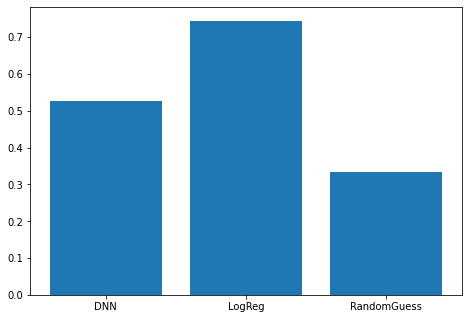

In [207]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['DNN', 'LogReg', 'RandomGuess']
vals = [0.526, 0.745, 0.333]
ax.bar(names,vals)
plt.show()

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(complete_features_fillna,complete_targets_fillna, test_size=0.2, random_state=42)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
model1 = LogisticRegression(max_iter=10000)
model1.fit(X_train, Y_train)
predicted = model1.predict(X_test)
acc_score = accuracy_score(Y_test, predicted)
print("Accuracy score: " + str(acc_score))
scores = cross_val_score(model1, X_train, Y_train, cv=10)
print("Cross val scores")
print(scores)
score_train = model1.score(X_train, Y_train)
score_test = model1.score(X_test, Y_test)

print("Training set accuracy: ", '%.3f'%(score_train))
print("Test set accuracy: ", '%.3f'%(score_test))

Accuracy score: 0.5657894736842105
Cross val scores
[0.51612903 0.35483871 0.51612903 0.35483871 0.56666667 0.33333333
 0.3        0.56666667 0.46666667 0.5       ]
Training set accuracy:  0.809
Test set accuracy:  0.566


In [145]:
predicted = model1.predict(complete_features_fillna)
predicted
predictedDF = pd.DataFrame(predicted, columns=['Predicted'])
predictedDF.head()

,Predicted
0,A
1,H
2,H
3,H
4,A


In [194]:
copyData = copy.deepcopy(raw_season_data[0])
copyData['predicted'] = predictedDF
# fixture_list = copy.deepcopy(seasonTable[0])
# fixture_list = fixture_list.merge(predictedDF, left_index=True, right_index=True)
# fixture_list
copyData

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,predicted
0,E0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,...,4,12,8,2,5,0,0,0,0,A
1,E0,14/08/2021,Man United,Leeds,5,1,H,1,0,H,...,3,11,9,5,4,1,2,0,0,H
2,E0,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,...,8,10,7,7,6,2,1,0,0,H
3,E0,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,...,1,15,11,5,2,0,0,0,0,H
4,E0,14/08/2021,Everton,Southampton,3,1,H,0,1,A,...,3,13,15,6,8,2,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,E0,09/04/2022,Aston Villa,Tottenham,0,4,A,0,1,A,...,5,12,14,9,3,2,3,0,0,A
305,E0,10/04/2022,Brentford,West Ham,2,0,H,0,0,D,...,1,2,6,4,6,0,1,0,0,D
306,E0,10/04/2022,Leicester,Crystal Palace,2,1,H,2,0,H,...,3,11,12,3,4,1,1,0,0,A
307,E0,10/04/2022,Norwich,Burnley,2,0,H,1,0,H,...,4,12,10,6,7,1,1,0,0,A


In [197]:
def create_home_dict_predicted(table,matchNum):
    matchDict={}
    if any('predicted' == table.keys()):
        matchDict={'predicted':table['predicted'].values[0]}
    elif any('Res'== table.keys()):
        matchDict = {'result':table['Res'].values[0]}
    if any('FTHG' == table.keys()):
        matchDict.update({'Goals':table['FTHG'].values[0]})
    elif any('HG'== table.keys()):
        matchDict.update({'Goals':table['HG'].values[0]})
    if any('FTAG' == table.keys()):
        matchDict.update({'GoalsConceded':table['FTAG'].values[0]})
    elif any('AG'== table.keys()):
        matchDict.update({'GoalsConceded':table['AG'].values[0]})
    matchDict.update({'match':matchNum,'ground':'H', \
                        'Date':table['Date'].values[0],\
                        'TeamAgainst':table['AwayTeam'].values[0],\
                        'HTGoals':table['HTHG'].values[0], \
                        'HTResult':table['HTR'].values[0], \
                        #'Attendance':table['Attendance'].values[0], \
                        'Shots':table['HS'].values[0],\
                        'ShotsAgainst':table['AS'].values[0],\
                        'ShotsOnTarget':table['HST'].values[0],\
                        'ShotsAgainstOnTarget':table['AST'].values[0],\
                        #'ShotsWoodwork':table['HHW'].values[0],\
                        #'ShotsAgainstWoodwork':table['AHW'].values[0],\
                        'Corners':table['HC'].values[0],\
                        'CornersAgainst':table['AC'].values[0],\
                        'FoulsCommited':table['HF'].values[0],\
                        'FoulsAgainst':table['AF'].values[0],\
                        #'Offsies':table['HO'].values[0],\
                        #'OffsidesAgainst':table['AO'].values[0],\
                        'YCards':table['HY'].values[0],\
                        'YCardsAgainst':table['AY'].values[0],\
                        'RCards':table['HR'].values[0],\
                        'RCardsAgainst':table['AR'].values[0]})
                        #'BookingPoints':table['HBP'].values[0],\
                        #'BookingPointsAgainst':table['ABP'].values[0]})

    matchDict.update({'BigChancesCreated': matchDict['ShotsOnTarget']+matchDict['Goals']})
    if matchDict['predicted']=='H':
        matchDict.update({'Win':1,'Draw':0, 'Lose':0})
    elif matchDict['predicted']=='A':
        matchDict.update({'Win':0,'Draw':0, 'Lose':1})
    else:
        matchDict.update({'Win':0,'Draw':1, 'Lose':0})
    return pd.DataFrame(matchDict,index=[matchNum,])


def create_away_dict_predicted(table,matchNum):
    matchDict={}
    if any('predicted' == table.keys()):
        matchDict={'predicted':table['predicted'].values[0]}
    elif any('Res'== table.keys()):
        matchDict = {'result':table['Res'].values[0]}
    if any('FTHG' == table.keys()):
        matchDict.update({'GoalsConceded':table['FTHG'].values[0]})
    elif any('HG'== table.keys()):
        matchDict.update({'GoalsConceded':table['HG'].values[0]})
    if any('FTAG' == table.keys()):
        matchDict.update({'Goals':table['FTAG'].values[0]})
    elif any('AG'== table.keys()):
        matchDict.update({'Goals':table['AG'].values[0]})
    matchDict.update({'match':matchNum,'ground':'A', \
                        'Date':table['Date'].values[0],\
                        'TeamAgainst':table['HomeTeam'].values[0],\
                        'HTGoals':table['HTAG'].values[0], \
                        'HTResult':table['HTR'].values[0], \
                        #'Attendance':table['Attendance'].values[0], \
                        'Shots':table['AS'].values[0],\
                        'ShotsAgainst':table['HS'].values[0],\
                        'ShotsOnTarget':table['AST'].values[0],\
                        'ShotsAgainstOnTarget':table['HST'].values[0],\
                        #'ShotsWoodwork':table['AHW'].values[0],\
                        #'ShotsAgainstWoodwork':table['HHW'].values[0],\
                        'Corners':table['AC'].values[0],\
                        'CornersAgainst':table['HC'].values[0],\
                        'FoulsCommited':table['AF'].values[0],\
                        'FoulsAgainst':table['HF'].values[0],\
                        #'Offsies':table['AO'].values[0],\
                        #'OffsidesAgainst':table['HO'].values[0],\
                        'YCards':table['AY'].values[0],\
                        'YCardsAgainst':table['HY'].values[0],\
                        'RCards':table['AR'].values[0],\
                        'RCardsAgainst':table['HR'].values[0]})
                        #'BookingPoints':table['ABP'].values[0],\
                        #'BookingPointsAgainst':table['HBP'].values[0]})
    matchDict.update({'BigChancesCreated': matchDict['ShotsOnTarget']+matchDict['Goals']})
    if matchDict['predicted']=='A':
        matchDict.update({'Win':1,'Draw':0, 'Lose':0})
    elif matchDict['predicted']=='H':
        matchDict.update({'Win':0,'Draw':0, 'Lose':1})
    else:
        matchDict.update({'Win':0,'Draw':1, 'Lose':0})
    return pd.DataFrame(matchDict,index=[matchNum,])

# The function below runs through each season, and each distinct team for that season and 
# uses the above functions to build the snapshot database

def build_snapshot_table_predicted(raw_data,snapshots):
    # for i in raw_data.keys():
        snapshots={}
        for j in list(set(raw_data['AwayTeam'])):
            snapshots[j] = pd.DataFrame()
            tsTable=raw_data[(raw_data['AwayTeam']==j) | (raw_data['HomeTeam']==j)]
            for k in range(len(tsTable)):
                if j == tsTable.iloc[k]['AwayTeam']:
                    snapshots[j] = snapshots[j].append(create_away_dict_predicted(tsTable[k:k+1],k+1))
                elif j == tsTable.iloc[k]['HomeTeam']:
                    snapshots[j] = snapshots[j].append(create_home_dict_predicted(tsTable[k:k+1],k+1))
        return snapshots

snapshots1={}
helper111 = build_snapshot_table_predicted(copyData, snapshots1)
helper111
# build_season_table(helper111)

{'Arsenal':    predicted  GoalsConceded  Goals  match ground        Date     TeamAgainst  \
 1          A              2      0      1      A  13/08/2021       Brentford   
 2          A              2      0      2      H  22/08/2021         Chelsea   
 3          D              5      0      3      A  28/08/2021        Man City   
 4          A              0      1      4      H  11/09/2021         Norwich   
 5          H              0      1      5      A  18/09/2021         Burnley   
 6          H              1      3      6      H  26/09/2021       Tottenham   
 7          H              0      0      7      A  02/10/2021        Brighton   
 8          A              2      2      8      H  18/10/2021  Crystal Palace   
 9          A              1      3      9      H  22/10/2021     Aston Villa   
 10         H              0      2     10      A  30/10/2021       Leicester   
 11         D              0      1     11      H  07/11/2021         Watford   
 12         A    

In [198]:
# Take entire dataframe and build a single row of aggregations
def build_season_stats(teamDF,team):
    return {'Team': team,
    'Wins': sum(teamDF['Win']),
    'Losses': sum(teamDF['Lose']),
    'Draws': sum(teamDF['Draw']),
    'Goals': sum(teamDF['Goals']),
    'GoalsAgainst': sum(teamDF['GoalsConceded']),
    'YCards': sum(teamDF['YCards']),
    'RCards': sum(teamDF['RCards']),
    'avg_Goals':np.mean(teamDF['Goals']),
    'avg_GoalsAgainst':np.mean(teamDF['GoalsConceded']),
    'avg_Corners':np.mean(teamDF['Corners']),
    'avg_CornersAgaints':np.mean(teamDF['CornersAgainst']),
    'avg_Fouls':np.mean(teamDF['FoulsCommited']),
    'avg_FoulsAgainst':np.mean(teamDF['FoulsAgainst']),
    'avg_Shots':np.mean(teamDF['Shots']),
    'avg_ShotsAgainst':np.mean(teamDF['ShotsAgainst']),
    'avg_BigChancesCreated':np.mean(teamDF['BigChancesCreated']),
    }
## Take a season + team snapshot, query all,home and away games into smaller dataframes and feed them into build_season_stats,
## Add home and away prefix to show aggregations specific to the stadiums.
def build_team_summary(teamDF,team):
    # homeDF = teamDF.query('ground == "H" ')
    # awayDF = teamDF.query('ground == "A" ')
    seasonDict = build_season_stats(teamDF, team)
    # homeDict = build_season_stats(homeDF,team)
    # awayDict = build_season_stats(awayDF, team)
    # homeDict = dict(zip(["home_" + i for i in homeDict.keys()],homeDict.values()))
    # awayDict = dict(zip(["away_" + i for i in awayDict.keys()],awayDict.values()))
    # seasonDict= {**seasonDict,**homeDict,**awayDict}
    seasonDict = {**seasonDict,**{'Points' : 3*seasonDict['Wins'] + (1 *seasonDict['Draws']), 'GD': seasonDict['Goals'] - seasonDict['GoalsAgainst']  }}

    return pd.DataFrame(seasonDict,index=[team,])

## Build entire database, take snapshots data and run through season+team data.
def build_season_table(snapshots):
    seasonTab = {}
    # print(snapshots.keys())
    # print(snapshots.keys())
    for i in snapshots.keys():
        
      seasonTab[i] = pd.DataFrame()
      for k in snapshots.keys():
        seasonTab[i] = seasonTab[i].append(build_team_summary(snapshots[k],k))
      seasonTab[i] = seasonTab[i].sort_values(by=['Points','GD'],ascending=False)
      seasonTab[i]['Position'] = np.linspace(1,20,20)
      return seasonTab

## build into seasonTable
seasonTable = build_season_table(helper111)
seasonTable

{'West Ham':                           Team  Wins  Losses  Draws  Goals  GoalsAgainst  \
 Man United          Man United    16       7      8     49            42   
 Everton                Everton    16       9      5     33            52   
 Leicester            Leicester    15      10      4     45            48   
 Tottenham            Tottenham    14      11      6     56            37   
 Watford                Watford    14      11      6     29            60   
 Liverpool            Liverpool    13      11      7     79            22   
 Brentford            Brentford    12      10     10     39            48   
 Brighton              Brighton    15      15      1     28            37   
 West Ham              West Ham    11       9     12     51            42   
 Aston Villa        Aston Villa    13      12      6     42            46   
 Chelsea                Chelsea    13      12      5     64            23   
 Wolves                  Wolves    14      16      2     33     